### CUNY Hackathon: Analyzing the risk and returns of holding Tesla stocks

In [117]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from scipy import stats
import seaborn as sns

from iexfinance.stocks import Stock
import pyEX as p

In [118]:
c= p.Client(api_token = 'Tpk_3cd1f8cfeb4a4f849c4b5688a752e3d4', version = 'sandbox')

In [119]:
def get_data(symbol):
    stock = c.chartDF(symbol, timeframe = '5y')
    stock_df= stock[['open', 'close', 'high', 'low', "volume"]]
    
    return stock_df

In [120]:
tsla = get_data("TSLA")
tsla.head()

,open,close,high,low,volume
date,,,,,
2021-01-22,838.71,872.10,881.0000,848.2900,20981157
2021-01-21,893.00,878.50,861.5615,852.4846,20660781
2021-01-20,877.22,888.95,862.7000,856.6500,25927698
2021-01-19,840.80,859.60,881.0000,845.0000,25713763
2021-01-15,864.00,845.68,874.5000,836.9000,40395889


In [125]:
SP500= pdr.get_data_yahoo("^GSPC",
                          start = "2016-01-25",
                          end= "2021-01-22")

In [128]:
SP500= SP500.sort_index(ascending = False)

## 2. Graph the closing price over the years for Tesla

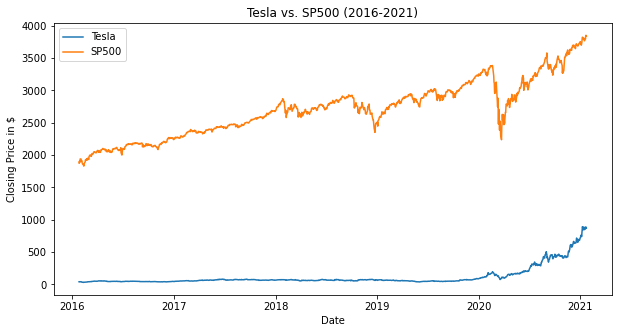

In [129]:
#Define the x and y labels for the graph

plt.figure(figsize= (10,5))

x = tsla.index         #Date
y= tsla['close']   #Price

x1= SP500.index
y1= SP500['Close']

plt.xlabel("Date")
plt.ylabel("Closing Price in $")

plt.plot(x,y)
plt.plot(x1,y1)
plt.title("Tesla vs. SP500 (2016-2021)")
plt.legend(["Tesla", "SP500"])

##### Clearly, this does not give us a good comparison. We have to calculate the % change.

## 3. Calculate the monthly and daily percentage change

In [130]:
#Calculate the percentage change of the adjusted close, including all rows 
#but the first one (daily& monthly)
tsla_daily_returns = tsla['close'].pct_change()[1:]
tsla_monthly_returns= tsla["close"].resample("M").ffill().pct_change()

SP500_daily_returns = SP500["Close"].pct_change()[1:]
SP500_monthly_returns= SP500["Close"].resample("M").ffill().pct_change()

In [131]:
SP500_daily_returns.head()

Date
2021-01-21    0.003020
2021-01-20   -0.000317
2021-01-19   -0.013744
2021-01-15   -0.008071
2021-01-14    0.007242
Name: Close, dtype: float64

## 4. Plot the monthly returns of Tesla and SP500

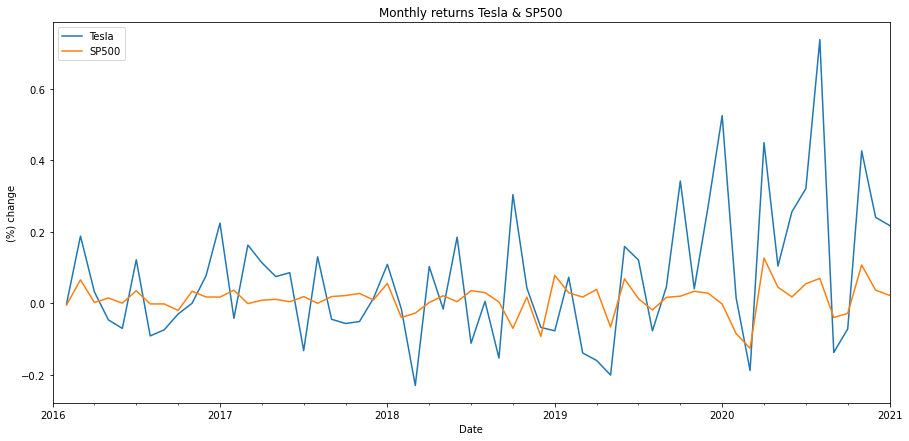

In [132]:
plt.figure(figsize= (15,7)) 
tsla_monthly_returns.plot()
SP500_monthly_returns.plot()

plt.xlabel("Date")
plt.ylabel("(%) change")
plt.title("Monthly returns Tesla & SP500")
plt.legend(["Tesla", "SP500"])
plt.show()

Based on the graph, Tesla looks like an **aggressive** stock (Beta>1) but we still have to calculate it.

### 5. Graph the monthly returns of Tesla vs. SP500 returns

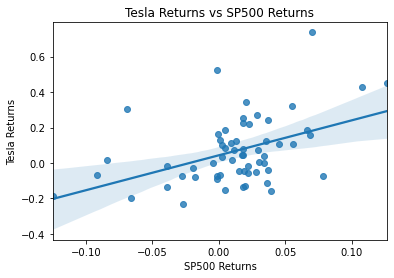

In [133]:
fig, ax = plt.subplots()

sns.regplot(SP500_monthly_returns.values,
tsla_monthly_returns.values)
plt.xlabel("SP500 Returns")
plt.ylabel("Tesla Returns")
plt.title("Tesla Returns vs SP500 Returns")
plt.show()

Interpretation: This graph illustrates the relationship between the returns of Tesla and the returns of S&P 500. The slope of the line is pretty flat and means that the beta is not very high. The scatter around the line explains the firm's specific risk. The further the points from the line indicate a higher firm-specific risk.

## 6. Calculate the Beta and Alpha Value of Tesla against SP500

In [139]:
(beta, alpha) = stats.linregress(SP500_daily_returns, tsla_daily_returns.values)[0:2]

In [146]:
print ("Tesla is considered an aggressive stock, because its beta value \nis", round(beta, 3),
      "and its alpha is ", round(alpha, 3))

Tesla is considered an aggressive stock, because its beta value 
is 1.315 and its alpha is  -0.001


## 8. Find the Standard deviation on monthly returns

In [151]:
print("Standard Deviation Tesla:", round(tsla_monthly_returns.std(),3))

Standard Deviation Tesla: 0.188


The Standard Deviation shows us the volatility of the Tesla's stock. The higher the std, the more volatile. With 18% the stock is in the lower area of volatility which is most likely related to the constant growth over the past 5 years.

In [152]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=873ce612c5ada3af0cb87a97bc08b271025363229cd7eb66dce623a950cd11c0
  Stored in directory: /Users/sandra/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


### First, we must check if there is a linear relationship between the closing and the opening price using a Scatter plot

To predict the closing price based on the opening price, there has to be a strong linear relationship.

Text(0, 0.5, 'Close Price')

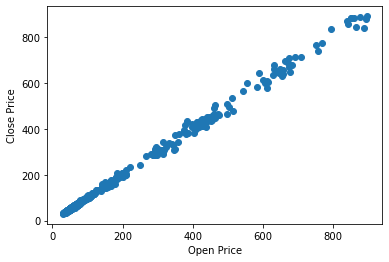

In [159]:
plt.scatter(tsla.open, tsla.close)
plt.xlabel("Open Price")
plt.ylabel("Close Price")

In [160]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = tsla[['open', 'high', 'low', 'volume']]
y = tsla['close']

transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer.fit(X)

X = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = LinearRegression().fit(X_train,y_train)

round(clf.score(X_train, y_train), 3)

0.999

The accuracy of 99% indicates a very close relationship between the opening and closing price.